Juan Jose Richard Anavi Chambi --- 
Yurika Macusaya Aguilar --- 
Raphael Fabriccio Loza Sanchez

In [ ]:
#Importamos las librerias base
import numpy as np
import pandas as pd
import seaborn as sns
#Importamos las librerias para realizar la particion, regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 

In [ ]:
#Cargamos el Dataset utilizando Pandas
df = pd.read_csv("https://raw.githubusercontent.com/CRAT-Training/datasets/master/Dataset2/Student-Pass-Fail-Data.csv")
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


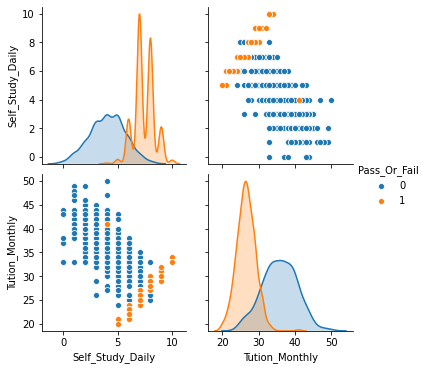

In [ ]:
#Graficamos el DataSet para ver como se comportan los datos
sns.p
sns.pairplot(df, hue = 'Pass_Or_Fail', vars = ['Self_Study_Daily', 
                                               'Tution_Monthly'])

Los datos tienen un comportamiento muy similar a la regresion linear, sin embargo optamos por la regresion logistica ya que la variable a predecir solo tiene dos opciones (Pass - Fail)

In [ ]:
#Verificamos si existe algun valor nulo

df.isnull().sum()


Self_Study_Daily    0
Tution_Monthly      0
Pass_Or_Fail        0
dtype: int64

In [ ]:
#Preparamos la separacion de la columna target
X = pd.DataFrame(np.c_[df["Self_Study_Daily"],df["Tution_Monthly"]], 
                 columns=["Self_Study_Daily","Tution_Monthly"])
y = df['Pass_Or_Fail']

In [ ]:
#Realizamos la separacion del dataset en entrenamiento y prueba
# 80 entrenamiento - 20 pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)

In [ ]:
#Regresion Logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Score
logreg.score(X_test,y_test)

0.99

In [ ]:
#Cargando la prediccion
y_pred = percep.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [ ]:
#Exactitud
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Exactitud {:.2f}'.format(round((accuracy * 100), 2)))

Exactitud 98.00


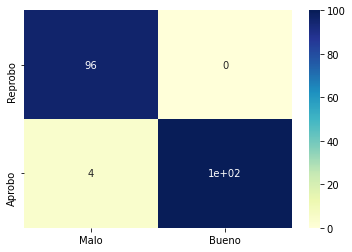

In [ ]:
#Matriz
matrix = np.array(confusion_matrix(y_test, y_pred, labels = [1, 0]))
confusion = pd.DataFrame(matrix, index = ['Reprobo', 'Aprobo'],
                         columns = ['Malo', 'Bueno'])

sns.heatmap(confusion, annot=True, cmap='YlGnBu')

In [ ]:
#Prediccion con datos 15 Horas de estudia diario y 10 horas de Turoria al mes
result = percep.predict([[15,10]])
print("Datos Arrojados:  1 = aprobo; 0 = reprobo")
print("la prediccion = ",result)

Datos Arrojados:  1 = aprobo; 0 = reprobo
la prediccion =  [1]


En base a los resultados podemos concluir que el tiempo de estudio individual tiene mayor peso que el tiempo de tutorias al mes. Para determinar si un estudiante Aprueba o Reprueba la materia.